In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd
import ast
import glob
import functools

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import project as project
importlib.reload(project);

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
data_dir = '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/sieci/'
csv_files = glob.glob(data_dir + "Higgs*.csv")

In [3]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)

    for col in ['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi']:
        df[col] = df[col].apply(ast.literal_eval)

    
    df['tau1_pt'] = df['tau.pt'].apply(lambda x: x[0])
    df['tau2_pt'] = df['tau.pt'].apply(lambda x: x[1])
    df['tau1_eta'] = df['tau.eta'].apply(lambda x: x[0])
    df['tau2_eta'] = df['tau.eta'].apply(lambda x: x[1])
    df['tau1_phi'] = df['tau.phi'].apply(lambda x: x[0])
    df['tau2_phi'] = df['tau.phi'].apply(lambda x: x[1])
    df['H_pt'] = df['H.pt'].apply(lambda x: x[0])
    df['H_eta'] = df['H.eta'].apply(lambda x: x[0])
    df['H_phi'] = df['H.phi'].apply(lambda x: x[0])

    df.drop(columns=['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi'], inplace=True)

    dfs.append(df)

In [4]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,H.m,H.E,t1.m,t1.E,t2.m,t2.E,METx,METy,trueMETx,trueMETy,...,type2,tau1_pt,tau2_pt,tau1_eta,tau2_eta,tau1_phi,tau2_phi,H_pt,H_eta,H_phi
0,196.73200,282.94920,1.77682,184.299360,1.77682,98.64985,-50.879560,-7.675525,-52.073196,-13.297127,...,-1,76.953780,98.63361,1.519704,-0.002149,-2.765061,1.797632,115.700005,1.164141,2.515362
1,170.96394,454.64020,1.77682,127.403140,1.77682,327.23706,236.432200,-97.585000,246.659970,-110.700200,...,-1,124.511536,228.12059,0.214641,0.901347,-0.984634,-0.233547,330.250270,0.726369,-0.493766
2,403.04907,770.57380,1.77682,453.754670,1.77682,316.81910,18.701082,-1.000554,14.325636,21.218117,...,-1,90.911680,252.49693,-2.290618,-0.699414,-2.556309,0.778071,164.195970,-2.063401,0.884353
3,218.99274,233.65942,1.77682,108.677956,1.77682,124.98147,-43.222538,-18.162619,-33.788174,-6.049116,...,-1,102.301540,117.20386,-0.350866,-0.362030,0.301128,-2.878016,15.459115,-2.346176,-3.129083
4,234.15674,251.93723,1.77682,99.779755,1.77682,152.15747,104.295290,-8.689900,90.916330,-2.842107,...,-1,76.937290,137.41629,0.752438,-0.458990,2.402238,-0.038647,92.950200,-0.019375,0.524304


In [5]:
print(colored("Columns in the dataset:\n", 'green'), df.columns.values)
print(colored("Shape of the dataset:\n", 'red'), df.shape)

Columns in the dataset:
 ['H.m' 'H.E' 't1.m' 't1.E' 't2.m' 't2.E' 'METx' 'METy' 'trueMETx'
 'trueMETy' 'dm1' 'pt1' 'eta1' 'phi1' 'mass1' 'type1' 'dm2' 'pt2' 'eta2'
 'phi2' 'mass2' 'type2' 'tau1_pt' 'tau2_pt' 'tau1_eta' 'tau2_eta'
 'tau1_phi' 'tau2_phi' 'H_pt' 'H_eta' 'H_phi']
Shape of the dataset:
 (35586, 31)


In [6]:
input_features = [
    'dm1', 'pt1', 'eta1', 'phi1', 'mass1',
    'dm2', 'pt2', 'eta2', 'phi2', 'mass2',
    'trueMETx', 'trueMETy'
]

output_targets = [
    'H.m', 'H_pt', 'H_eta', 'H_phi',
    't1.m', 'tau1_pt', 'tau1_eta', 'tau1_phi',
    't2.m', 'tau2_pt', 'tau2_eta', 'tau2_phi'
]


output_targets = ['H.m', 'H_pt','tau1_pt','tau2_pt']


In [7]:
features = df[input_features].astype('float32').values
labels = df[output_targets].astype('float32').values

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

print(colored("Dataset:\n", 'blue'), dataset)
print(colored("Dataset length:\n", 'green'), len(features))

Dataset:
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(12,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>
Dataset length:
 35586


I0000 00:00:1749148904.538378 14980770 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749148904.538396 14980770 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
nStepsPerEpoch = project.nStepsPerEpoch
batchSize = project.batchSize
output_shape = len(output_targets)

minval = 5.0
maxval = 55.0
mean = 0.0
stddev = 1.0
rho_min = -1.0
rho_max = 1.0

adding_smeard_MET = functools.partial(project.add_smeared_MET, minval=minval, maxval=maxval, mean=mean, stddev=stddev, rho_min=rho_min, rho_max=rho_max)

dataset_train_preaper = dataset.batch(batchSize).map(adding_smeard_MET).take(nStepsPerEpoch).cache()

item = next(iter(dataset_train_preaper))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (16, 17)
Labels shape: (16, 4)


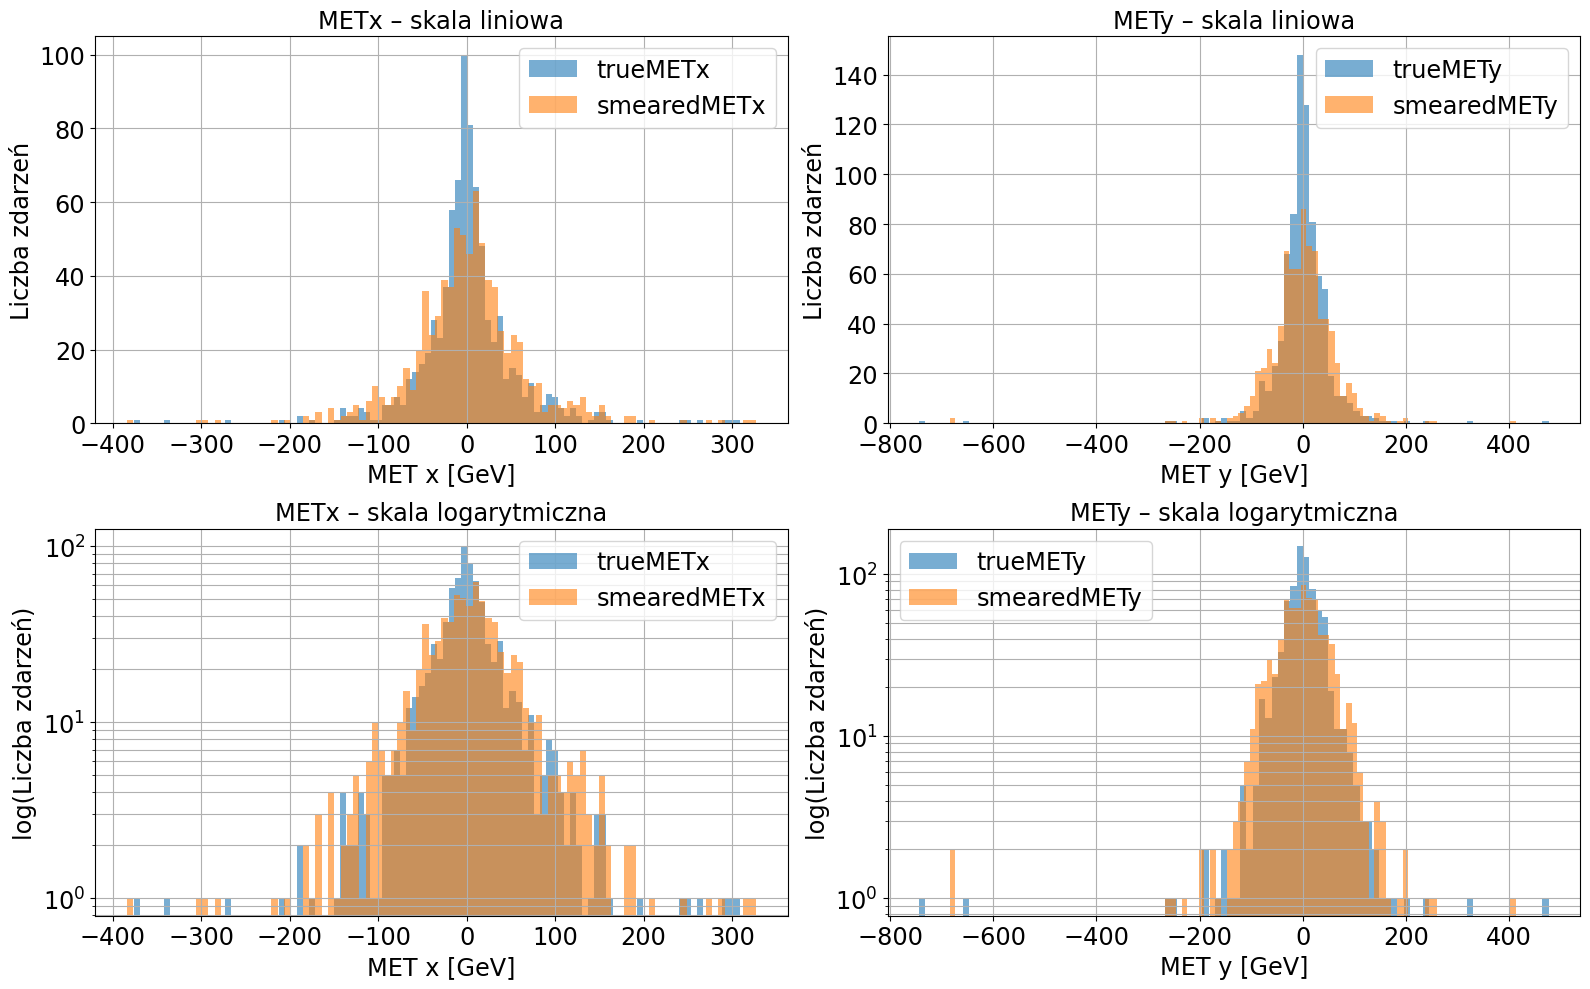

In [10]:
project.plot_MET(dataset_train_preaper)

In [11]:
dataset_train = dataset_train_preaper.map(project.remove_true_MET).cache()

item = next(iter(dataset_train))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (16, 15)
Labels shape: (16, 4)


## Model FCNN

In [12]:
model_fc = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(15,), name="model_input"),
    
    tf.keras.layers.Normalization(),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(256, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(512, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(32, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(output_shape, activation='relu', name="output") 
], name="FC_regression_model")

model_fc.summary()

Model: "FC_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,115 (977.02 KB)

 Trainable params: 250,084 (976.89 KB)

 Non-trainable params: 31 (128.00 B)

Epoch 1/300


E0000 00:00:1749148905.987718 14980770 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2096/2096 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - loss: 1164.1799 - val_loss: 753.9793
Epoch 2/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 768.5208 - val_loss: 721.5405
Epoch 3/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 732.6519 - val_loss: 698.0234
Epoch 4/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 714.6321 - val_loss: 698.1818
Epoch 5/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 705.1246 - val_loss: 691.1996
Epoch 6/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 695.8231 - val_loss: 705.1909
Epoch 7/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 692.6669 - val_loss: 692.2012
Epoch 8/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 685.3434 - val_loss: 691.7540
Epoch 9/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 681.2318 - val_loss: 686.5198
Epoch 10/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - loss: 677.6156 - val_loss: 687.5671
Epoch 11/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - 

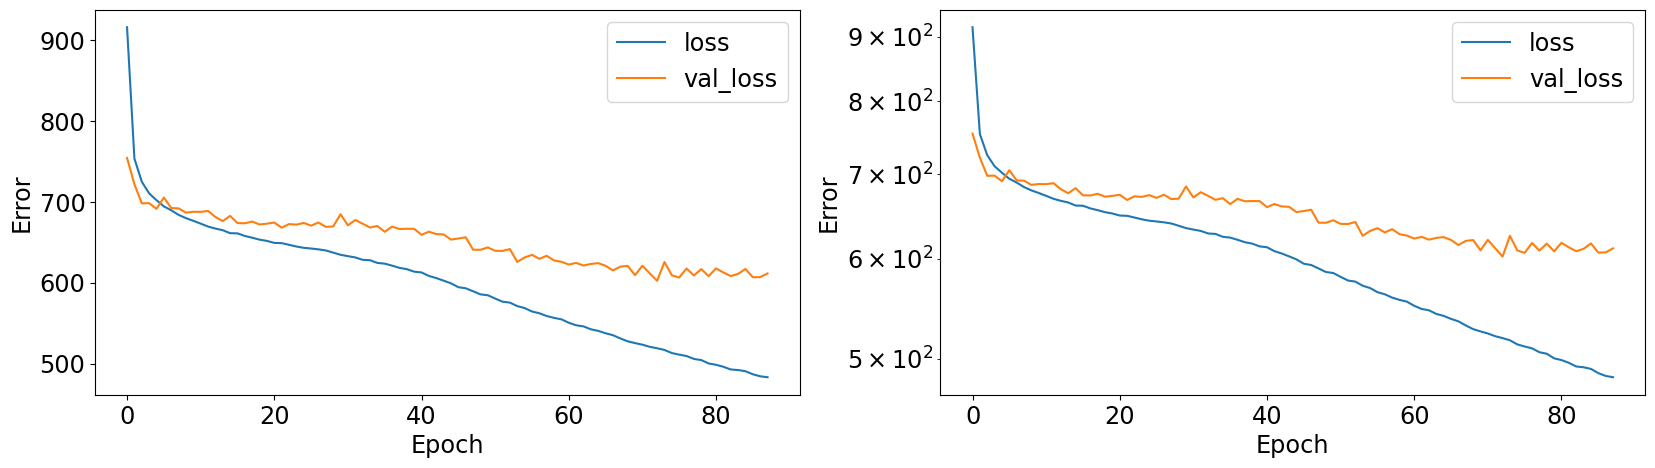

In [13]:
total_dataset = dataset_train.shuffle(2048).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

importlib.reload(project);

model_fc = project.trainModel(model_fc, train_data=train_batches, val_data=val_batches, nEpochs=300)

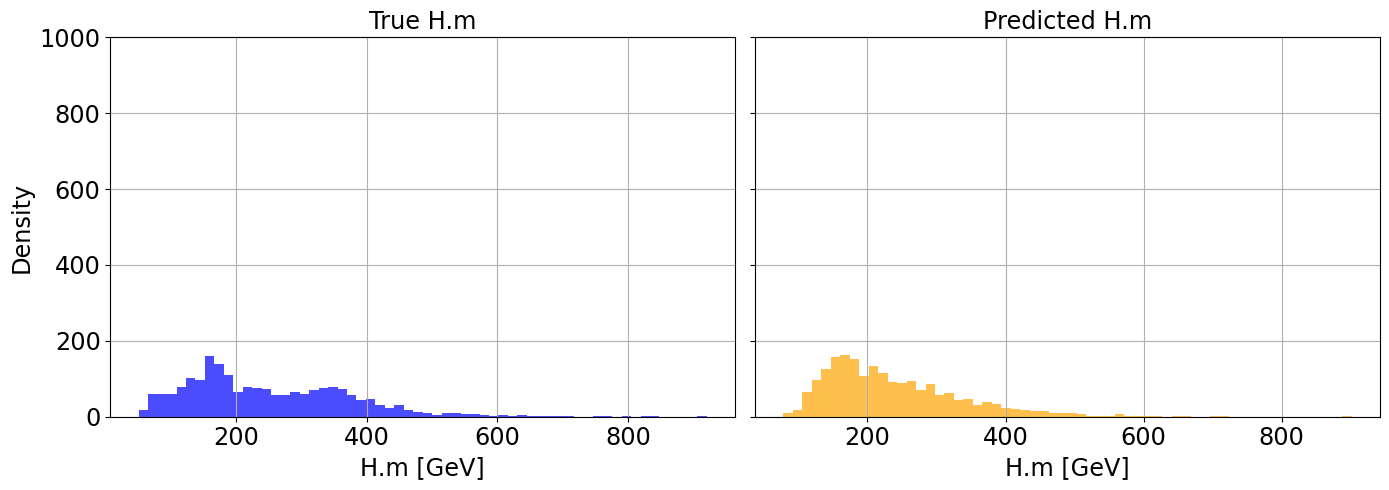

In [14]:
project.plot_H_mass(model_fc, val_batches)

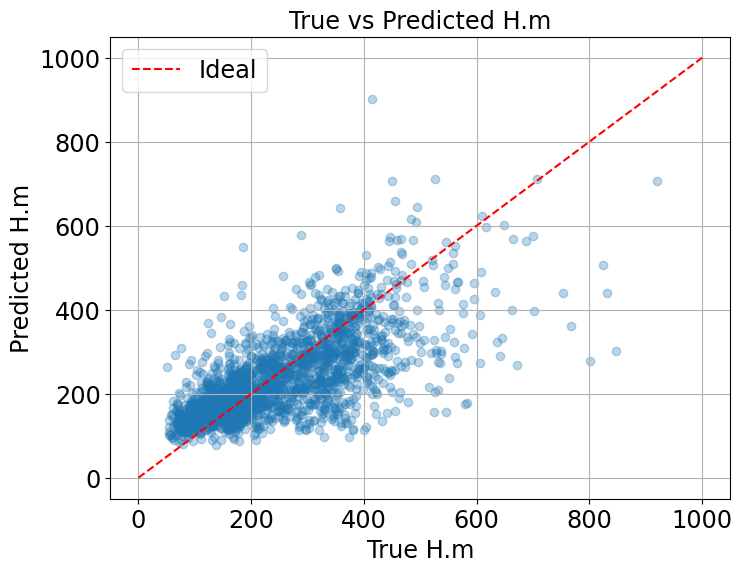

In [15]:
project.true_vs_predict_H_mass(model_fc, val_batches)

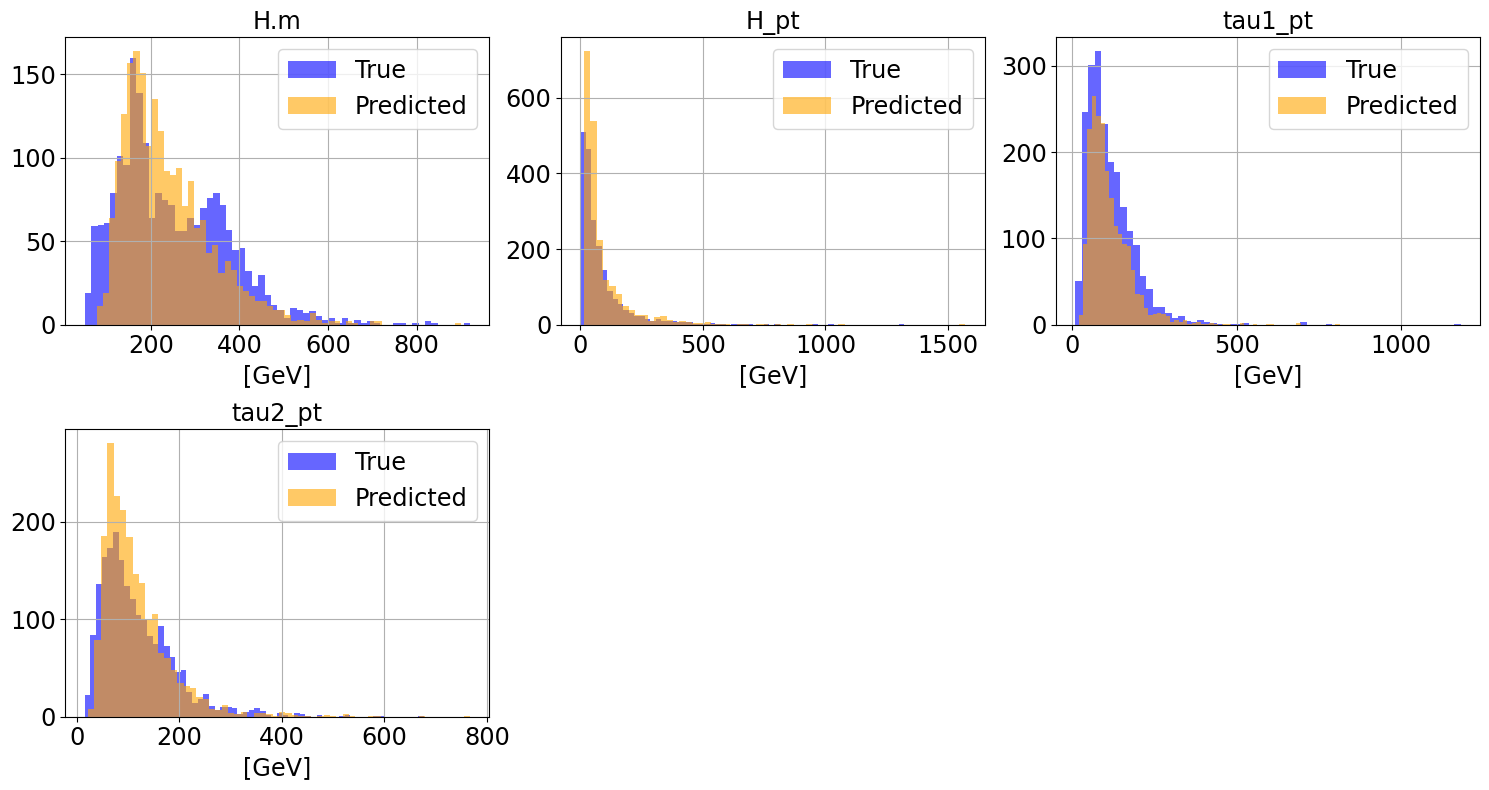

In [16]:
project.plot_all_labels(model_fc, val_batches, output_targets)

## Model architektury dwugałęziowej

In [17]:
dataset_train_test = dataset_train.unbatch()
dataset_split = dataset_train_test.map(project.split_inputs).batch(batchSize).cache()

total_dataset = dataset_split.shuffle(2048).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [18]:
input_particles = tf.keras.Input(shape=(10,), name="particles_input")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek
norm_particles = tf.keras.layers.Normalization()(input_particles)
x1 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles)
x1 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x2 = tf.keras.layers.Dense(32, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_met)
x2 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)

# Połączenie
x = tf.keras.layers.concatenate([x1, x2])
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual = tf.keras.Model(inputs={'particles_input': input_particles, 'met_input': input_met}, outputs=output)

model_dual.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input     │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 10)        │         21 │ particles_input[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │        704 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │        192 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │      8,320 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      2,112 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     33,024 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │      8,320 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 512)       │    197,120 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 256)       │    131,328 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │     32,896 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      8,256 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 4)         │        260 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 422,564 (1.61 MB)

 Trainable params: 422,532 (1.61 MB)

 Non-trainable params: 32 (136.00 B)

Epoch 1/300


E0000 00:00:1749151129.180853 14980770 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


   2095/Unknown 73s 34ms/step - loss: 1108.9382

/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
E0000 00:00:1749151201.253405 14980770 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2096/2096 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - loss: 1108.6815 - val_loss: 701.3901
Epoch 2/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - loss: 718.7973 - val_loss: 701.7133
Epoch 3/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 71s 34ms/step - loss: 699.2982 - val_loss: 676.2606
Epoch 4/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 685.7561 - val_loss: 667.4149
Epoch 5/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 677.2833 - val_loss: 660.2741
Epoch 6/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 667.9628 - val_loss: 656.1136
Epoch 7/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 662.6405 - val_loss: 642.5737
Epoch 8/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 656.3442 - val_loss: 642.6173
Epoch 9/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 72s 34ms/step - loss: 651.7838 - val_loss: 641.4651
Epoch 10/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 72s 35ms/step - loss: 645.2864 - val_loss: 638.8800
Epoch 11/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 75s 36ms/step - 

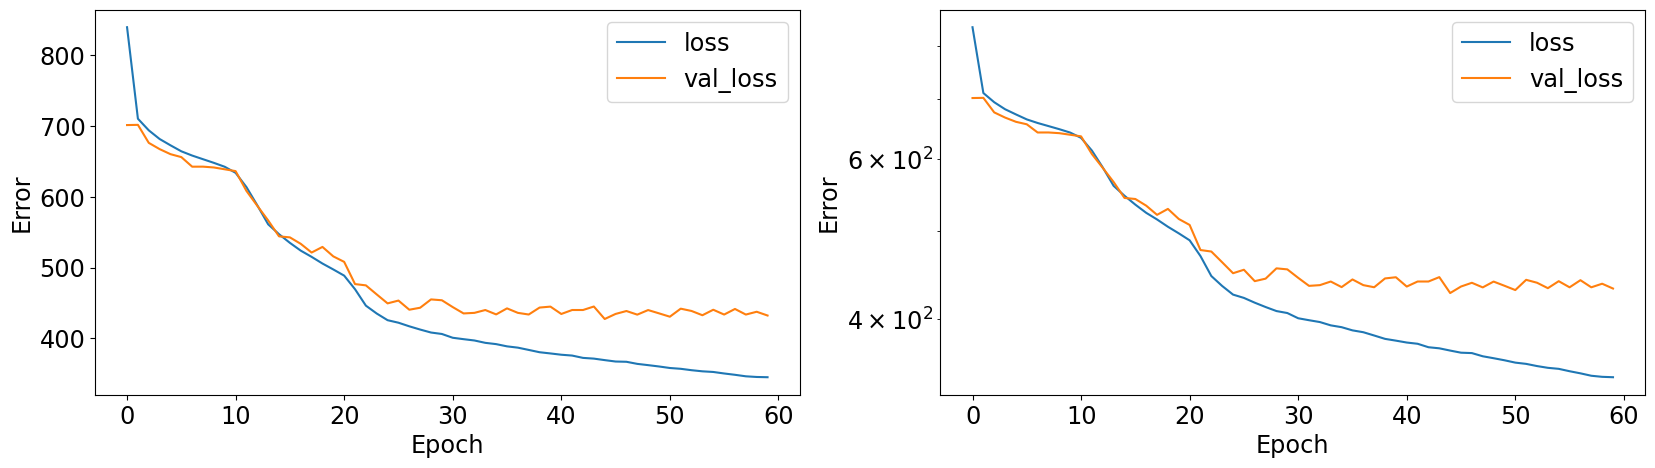

In [19]:
importlib.reload(project);

model_dual = project.trainModel(model_dual, train_data=train_batches, val_data=val_batches, nEpochs=300);

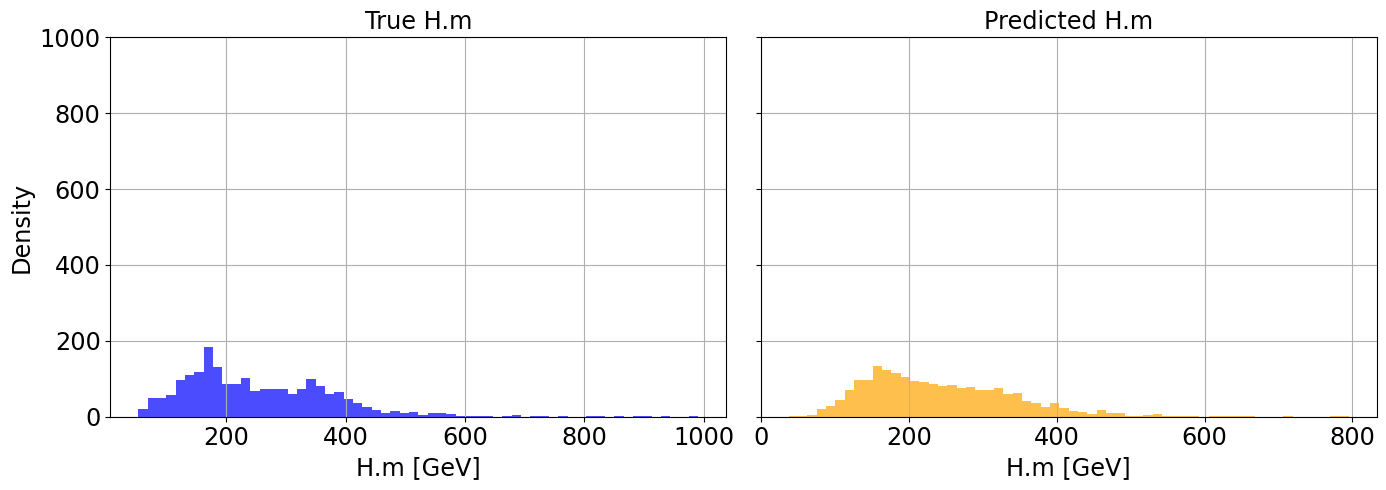

In [20]:
project.plot_H_mass(model_dual, val_batches)

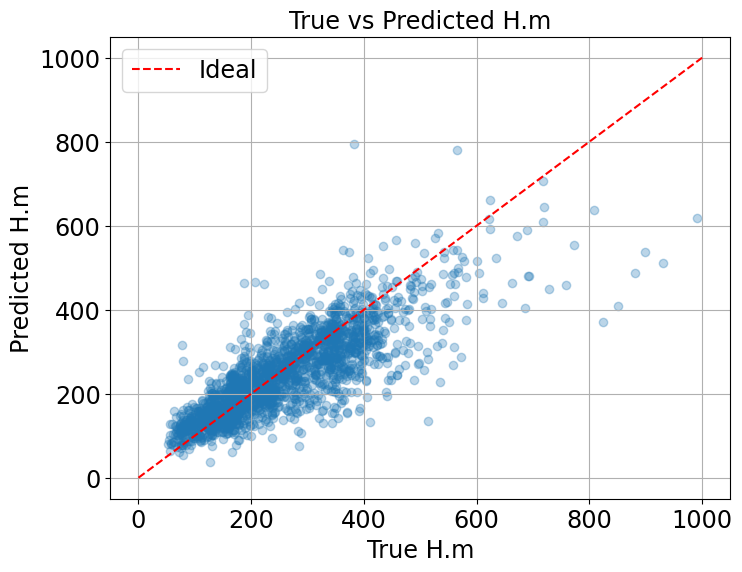

In [21]:
project.true_vs_predict_H_mass(model_dual, val_batches)

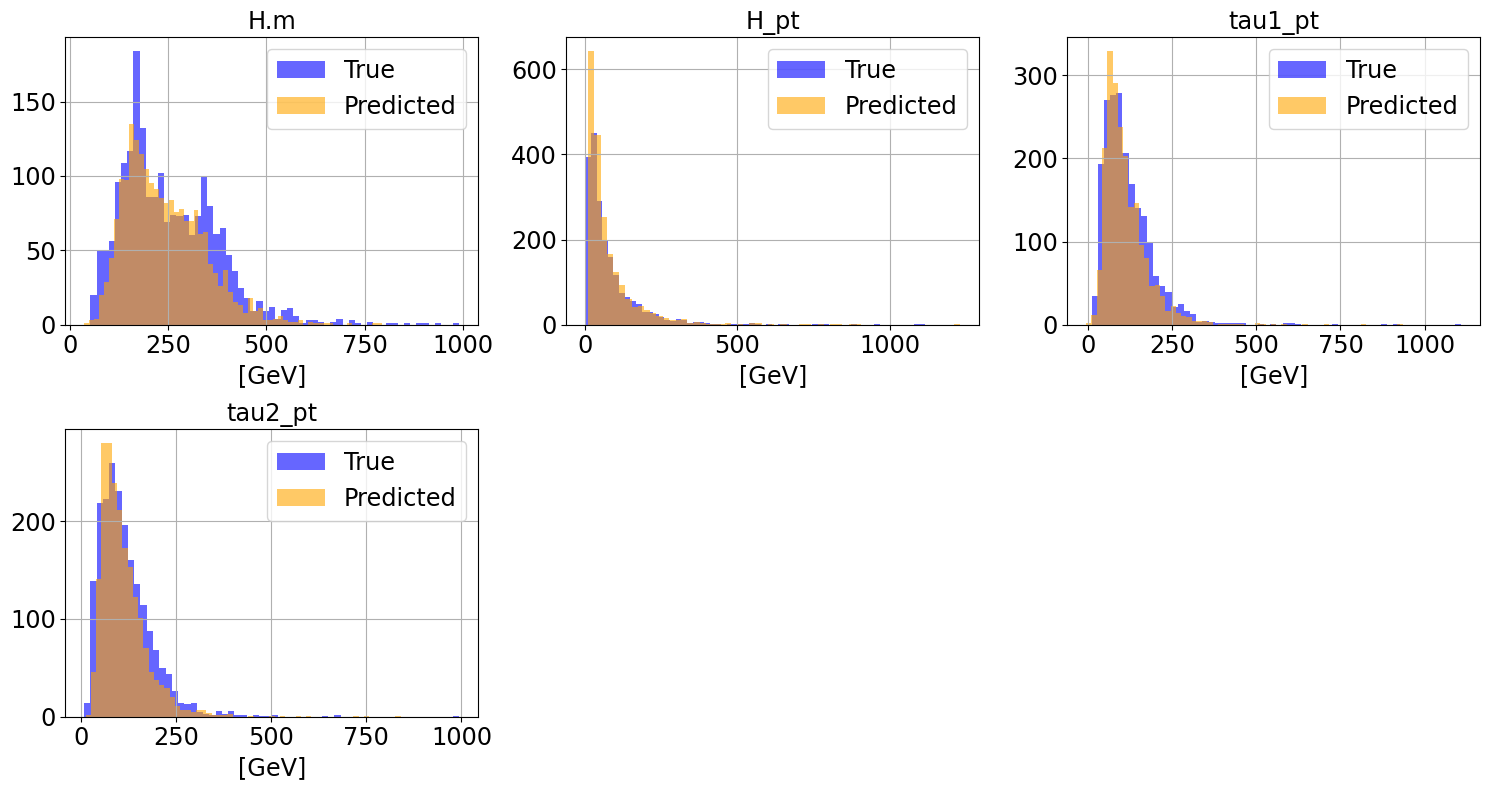

In [22]:
project.plot_all_labels(model_dual, val_batches, output_targets)

## Model architektury trójgałęziowej

In [23]:
dataset_train_test = dataset_train.unbatch()
dataset_split2 = dataset_train_test.map(project.split_inputs2).batch(batchSize).cache()

total_dataset = dataset_split2.shuffle(2048).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [24]:
input_particles1 = tf.keras.Input(shape=(5,), name="particles_input1")
input_particles2 = tf.keras.Input(shape=(5,), name="particles_input2")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek - 1
norm_particles1 = tf.keras.layers.Normalization()(input_particles1)
x1 = tf.keras.layers.Dense(64, activation='relu')(norm_particles1)
x1 = tf.keras.layers.Dense(128, activation='relu')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu')(x1)

# Gałąź cząstek - 2
norm_particles2 = tf.keras.layers.Normalization()(input_particles2)
x2 = tf.keras.layers.Dense(64, activation='relu')(norm_particles2)
x2 = tf.keras.layers.Dense(128, activation='relu')(x2)
x2 = tf.keras.layers.Dense(256, activation='relu')(x2)


#Połączona gałąź cząstek
x12 = tf.keras.layers.concatenate([x1, x2])
x12 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)
x12 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x3 = tf.keras.layers.Dense(32, activation='relu')(norm_met)
x3 = tf.keras.layers.Dense(64, activation='relu')(x3)
x3 = tf.keras.layers.Dense(128, activation='relu')(x3)

# Połączenie
x = tf.keras.layers.concatenate([x12, x3])
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual2 = tf.keras.Model(inputs={'particles_input1': input_particles1, 'particles_input2': input_particles2, 'met_input': input_met}, outputs=output)

model_dual2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input1    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ particles_input2    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 5)         │         11 │ particles_input1… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ particles_input2… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │        384 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │        384 │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │      8,320 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │      8,320 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │     33,024 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 256)       │     33,024 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ dense_19[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 32)        │        192 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 128)       │     65,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 64)        │      2,112 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │      8,256 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │      8,320 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dense_24[0][0],   │
│ (Concatenate)       │                   │            │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 512)       │     98,816 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 256)       │    131,328 │ dense_28[0][0]  

 Total params: 439,589 (1.68 MB)

 Trainable params: 439,556 (1.68 MB)

 Non-trainable params: 33 (144.00 B)

Epoch 1/300


E0000 00:00:1749155530.633054 14980770 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


   2096/Unknown 88s 41ms/step - loss: 894.6951

E0000 00:00:1749155618.394371 14980770 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2096/2096 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - loss: 894.6406 - val_loss: 756.2835
Epoch 2/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 704.4410 - val_loss: 741.3895
Epoch 3/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 688.7835 - val_loss: 746.1812
Epoch 4/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 681.7202 - val_loss: 724.3101
Epoch 5/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 673.6219 - val_loss: 729.2242
Epoch 6/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 666.3186 - val_loss: 722.0177
Epoch 7/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 656.4088 - val_loss: 717.0625
Epoch 8/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 651.7854 - val_loss: 726.2191
Epoch 9/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 648.5748 - val_loss: 721.0887
Epoch 10/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - loss: 644.5538 - val_loss: 724.2743
Epoch 11/300
2096/2096 ━━━━━━━━━━━━━━━━━━━━ 87s 42ms/step - l

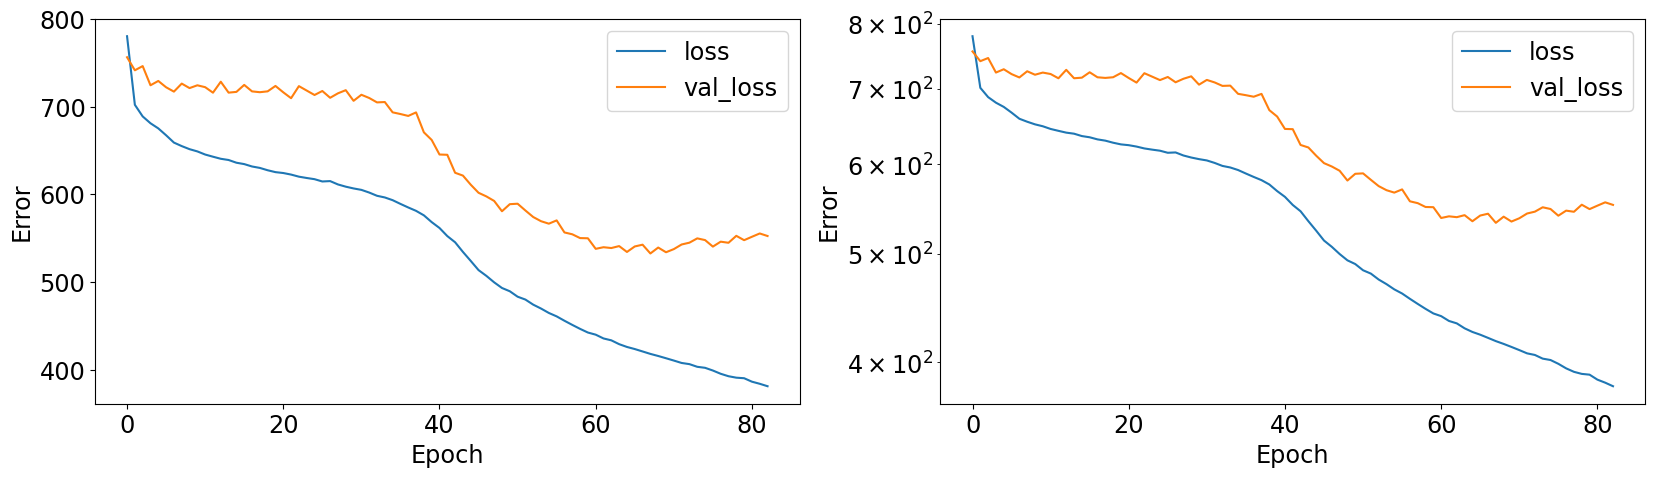

In [25]:
importlib.reload(project);

model_dual2 = project.trainModel(model_dual2, train_data=train_batches, val_data=val_batches, nEpochs=300);

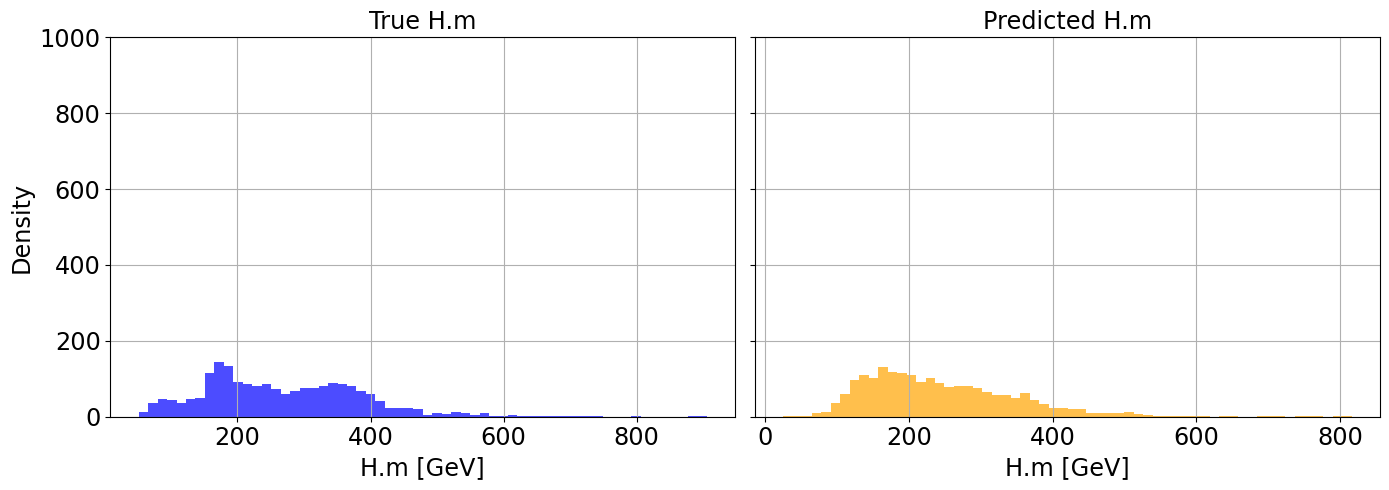

In [26]:
project.plot_H_mass(model_dual2, val_batches)

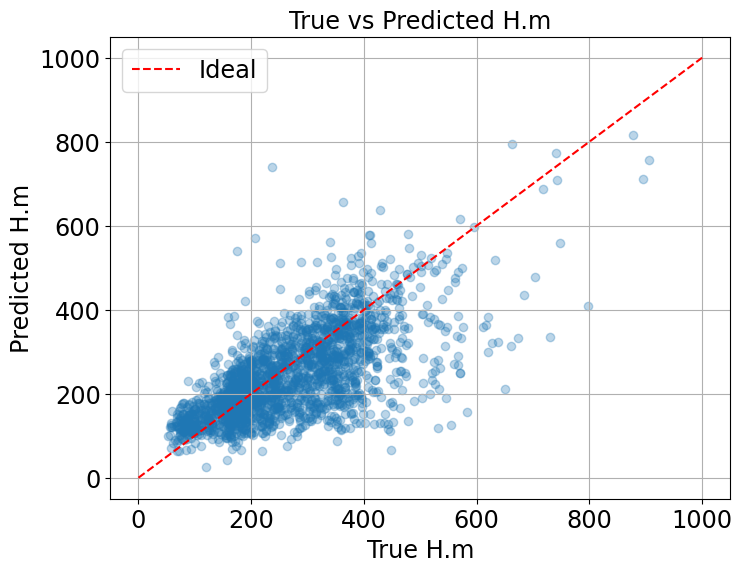

In [27]:
project.true_vs_predict_H_mass(model_dual2, val_batches)

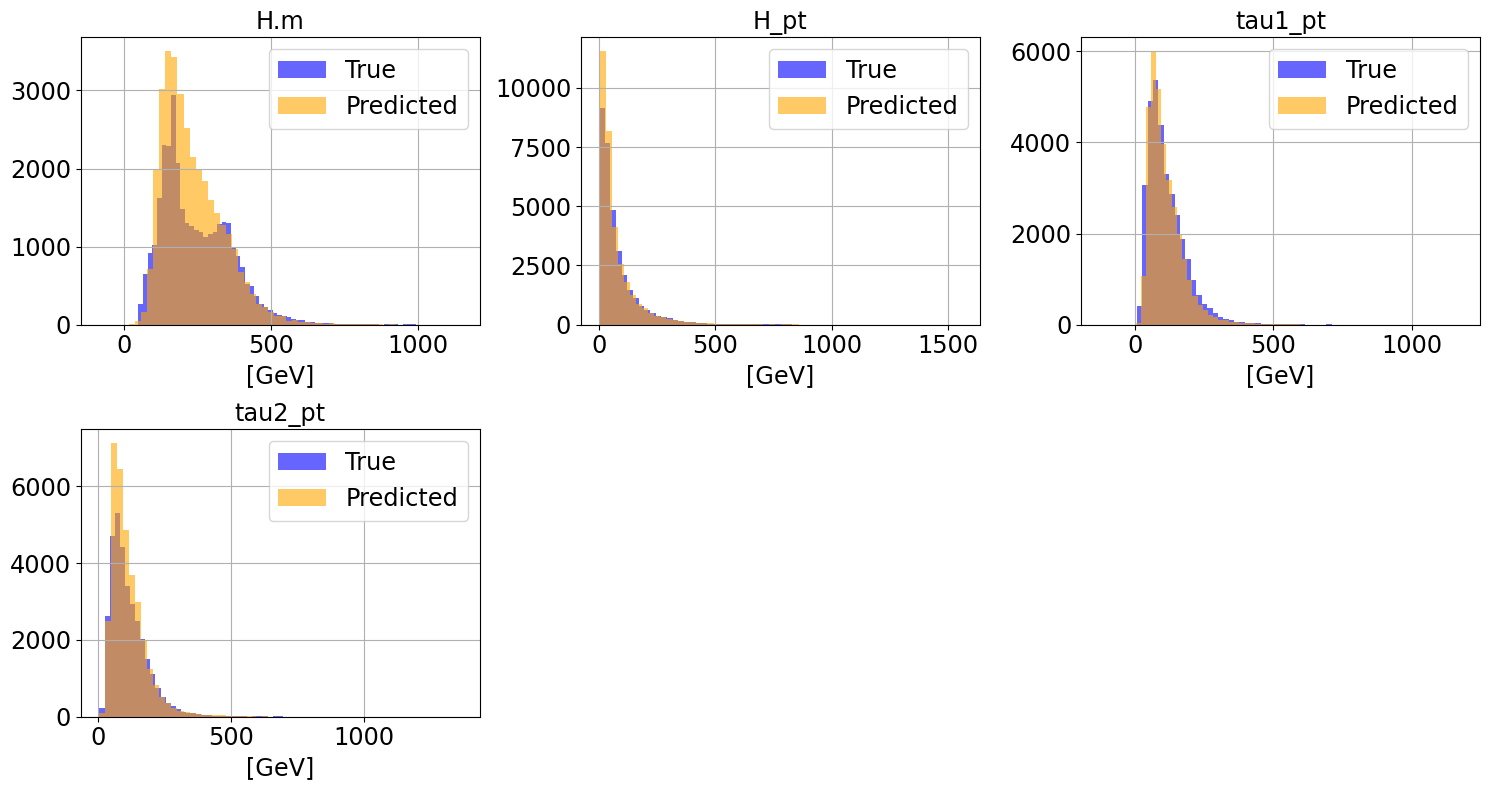

In [29]:
project.plot_all_labels(model_dual2, train_batches, output_targets)